In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

f=open('devices.txt', 'r')
devices = f.readlines()
for l in range(0,len(devices)):
    devices[l]=devices[l].replace('\n','')
print(devices)


['ac,200,10', 'washing_machine,400,9', 'dryer,100,5', 'roomba,500,7', 'microwave,100,4', 'ev,150,10']


In [2]:
max_priority=0
prior_device=None 
devices_order_priority=[]
aux=devices
'''Selecionar o device com maior prioridade'''
print('devices', devices)
for device in devices:
    for entry in aux:
        if entry not in devices_order_priority:
            data_entry=entry.split(',')
            p=int(data_entry[2])
            if p>max_priority:        
                max_priority=p
                prior_device=entry
    devices_order_priority.append(prior_device)
    max_priority=0
    prior_device=None     
print('ordered',devices_order_priority)

devices ['ac,200,10', 'washing_machine,400,9', 'dryer,100,5', 'roomba,500,7', 'microwave,100,4', 'ev,150,10']
ordered ['ac,200,10', 'ev,150,10', 'washing_machine,400,9', 'roomba,500,7', 'dryer,100,5', 'microwave,100,4']


In [3]:
def calculateConsumptionList(l):
    totalconsumption=0
    for entry in l:
        device=entry.split(',')        
        totalconsumption+=int(device[1])
    return totalconsumption

In [4]:
def decimalToBinary(n):
    return "{0:b}".format(int(n))

def binary_to_list(binary):
    # Iterate through the list and add a "1" to the result string for each "on" object
    # and a "0" for each "off" object
    lst = []
    i = 0
    for obj in str(binary):
        if obj == "1":
            lst.append(devices_order_priority[i])
        i += 1

    # Return the result as an integer
    return lst

 The best solution found:                                                                           
 [500.  51.]

 Objective function:
 12.5


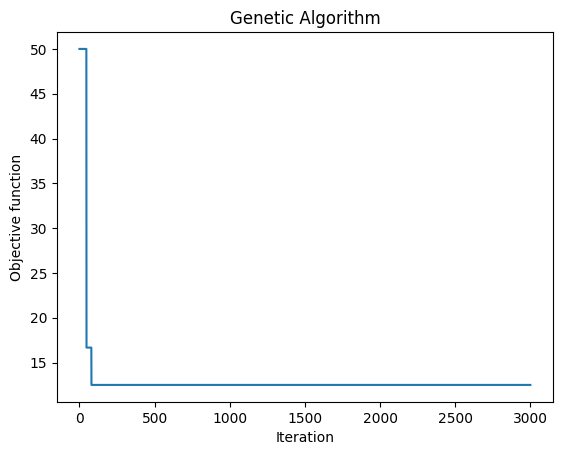

12.5
[500.  51.]
['ac,200,10', 'ev,150,10', 'dryer,100,5', 'microwave,100,4']


In [13]:

def f(X):
    binary = decimalToBinary(X[1])
    list = binary_to_list(binary)
    totalconsumption=calculateConsumptionList(list)
    if len(list)!=0:
        score = abs(totalconsumption-X[0])/len(list)
    else:
        score = abs(totalconsumption-X[0])
    return score

#transform list to binary adding 1 for each device
lista_devices_todos_ligados_decimal=[1]*len(devices_order_priority)
#transform binary to decimal
lista_devices_todos_ligados_decimal=pow(2,len(devices_order_priority))-1
varbound=np.array([[500,500], [0,lista_devices_todos_ligados_decimal]])

algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':len(devices_order_priority),\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()
print(model.best_function)
print(model.best_variable)
x=model.best_variable[1]
binary=decimalToBinary(x)
final=binary_to_list(binary)
print(final)